<a href="https://colab.research.google.com/github/SidddhantJain/Machine-Learning-Lab/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler




In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/Salaries_pd.csv")  # Replace with actual dataset path

# Display first few rows
print(df.head())



   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   
3    77916.0    56120.71   198306.9      NaN  332343.61         332343.61   
4   134401.6      9737.0  182234.59      NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1 

<ipython-input-2-f9e151cb49b8>:2: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Dataset/Salaries_pd.csv")  # Replace with actual dataset path


In [6]:
numeric_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting errors as NaN

# Filling missing values for numeric columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Filling categorical missing values
df['JobTitle'] = df['JobTitle'].fillna("Unknown")
df['Notes'] = df['Notes'].fillna("No Notes")  # Replace with a default value
df['Status'] = df['Status'].fillna("Unknown")


In [7]:

# Converting categorical columns to numeric using Label Encoding
df['JobTitle'] = df['JobTitle'].astype(str)
df['Agency'] = df['Agency'].astype(str)
df['Status'] = df['Status'].astype(str)

encoder = LabelEncoder()

for col in ['JobTitle', 'Agency', 'Status']:
    df[col] = encoder.fit_transform(df[col])

print("\nMissing Values after processing:\n", df.isnull().sum())

print("\nData Cleaning and Preprocessing Completed Successfully!")


Missing Values after processing:
 Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

Data Cleaning and Preprocessing Completed Successfully!


In [8]:

# Checking correlation
numeric_features = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
corr_matrix = df[numeric_features].corr()
print("\nCorrelation Matrix:\n", corr_matrix)


Correlation Matrix:
                    BasePay  OvertimePay  OtherPay  Benefits  TotalPay  \
BasePay           1.000000     0.266688  0.283747  0.797311  0.950689   
OvertimePay       0.266688     1.000000  0.316594  0.263699  0.504860   
OtherPay          0.283747     0.316594  1.000000  0.202007  0.470495   
Benefits          0.797311     0.263699  0.202007  1.000000  0.773559   
TotalPay          0.950689     0.504860  0.470495  0.773559  1.000000   
TotalPayBenefits  0.943166     0.467984  0.422341  0.814595  0.977313   

                  TotalPayBenefits  
BasePay                   0.943166  
OvertimePay               0.467984  
OtherPay                  0.422341  
Benefits                  0.814595  
TotalPay                  0.977313  
TotalPayBenefits          1.000000  


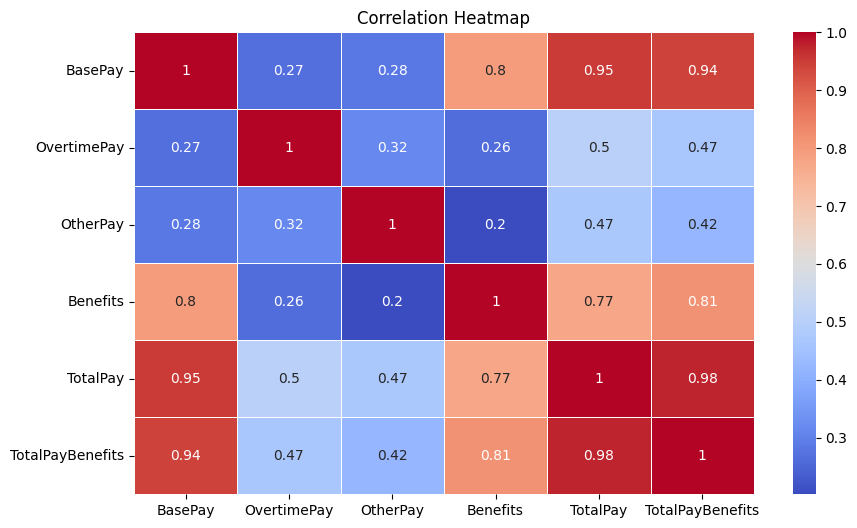

In [9]:

# Heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()





In [10]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['JobTitle'] = label_encoder.fit_transform(df['JobTitle'])
df['Agency'] = label_encoder.fit_transform(df['Agency'])

df = pd.get_dummies(df, columns=['Status'], drop_first=True)  # One-hot encoding


In [11]:

# Scaling numerical features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])




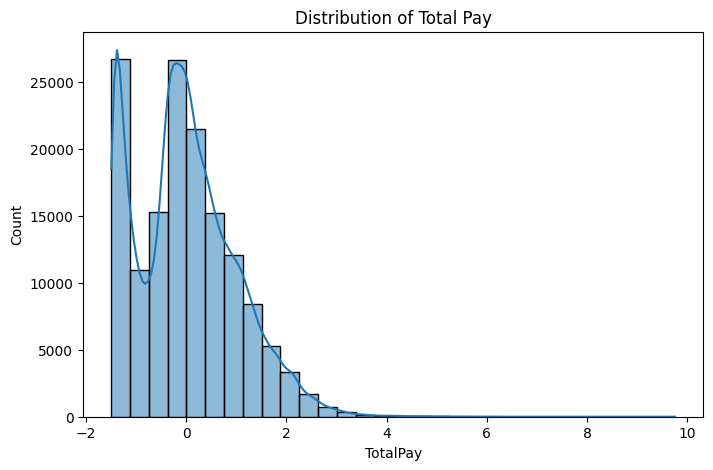

In [12]:

# Data Visualization
plt.figure(figsize=(8,5))
sns.histplot(df['TotalPay'], bins=30, kde=True)
plt.title("Distribution of Total Pay")
plt.show()

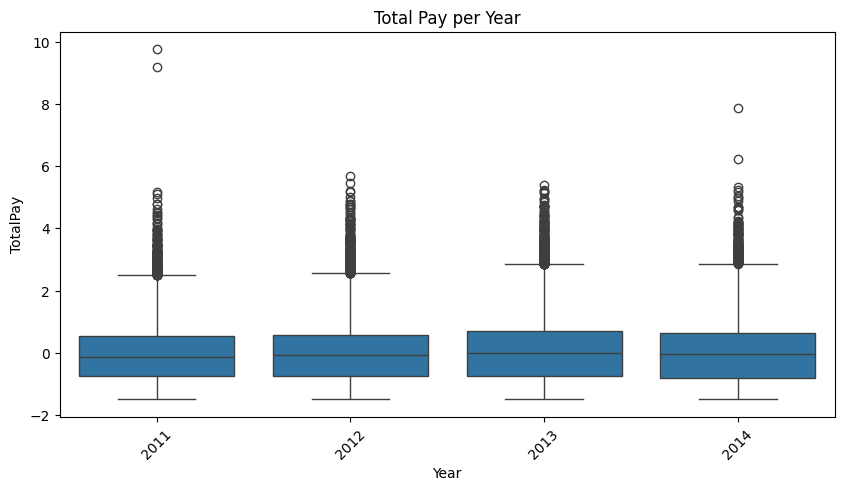

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='TotalPay', data=df)
plt.xticks(rotation=45)
plt.title("Total Pay per Year")
plt.show()

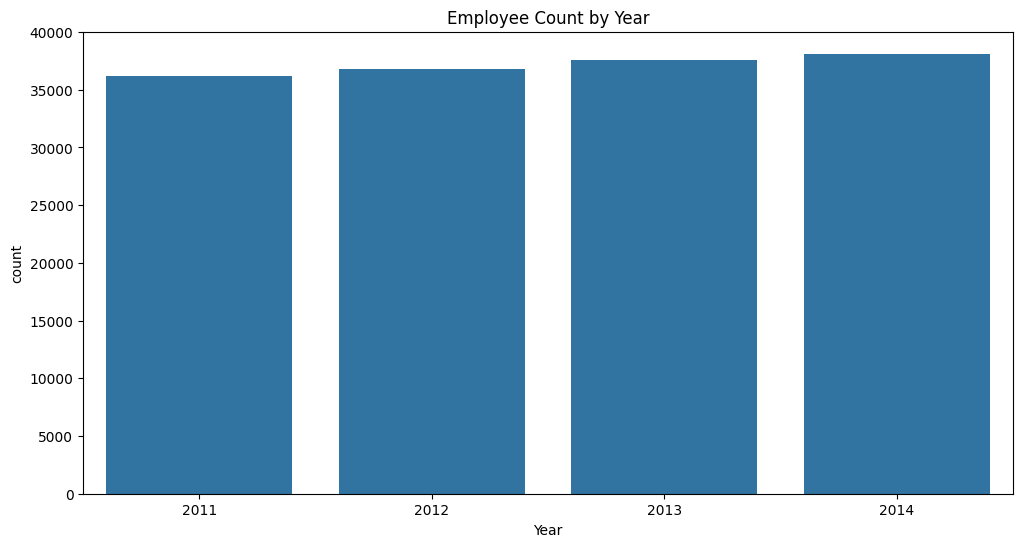

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df)
plt.title("Employee Count by Year")
plt.show()


In [15]:
print("Exploratory Data Analysis Completed.")

Exploratory Data Analysis Completed.
